#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [43]:
import numpy as np
import pandas as pd 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [44]:
dfs = []

for year in range(2019, 2022):
    filename = "startup_funding" + str(year) + ".csv"
    df_tmp = pd.read_csv(filename)
    df_tmp['Year'] = year
    dfs.append(df_tmp)

fnd = pd.concat(dfs, ignore_index=True)

fnd.shape

(2343, 10)

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [45]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 183.2+ KB


In [46]:
fnd.isnull().sum()

Company/Brand       0
Founded           241
HeadQuarter       115
Sector             18
What it does        0
Founders           19
Investor          100
Amount($)         132
Stage            1123
Year                0
dtype: int64

In [47]:
fnd['Year'] = pd.to_numeric(fnd['Year'])

In [48]:
fnd['Amount($)'] = fnd['Amount($)'].str.replace('$', '').str.replace(',', '')
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'], errors='coerce')

In [49]:
fnd['Amount($)'] = fnd['Amount($)'].fillna(0)

In [50]:
fnd['Amount($)'].sum()

271544633855.83002

3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [51]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [52]:
fnd_2020 = fnd[fnd['Year'] == 2020]

fnd_grouped = fnd_2020.groupby('Investor').size().reset_index(name='size')

fnd_sorted = fnd_grouped.sort_values(by='size', ascending=False)

fnd_sorted['ranking'] = fnd_sorted['size'].rank(method='min', ascending=False)

fnd_final = fnd_sorted.sort_values(by='ranking', ascending=True)

print(fnd_final)

                                        Investor  size  ranking
789                            Venture Catalysts    20      1.0
484                        Mumbai Angels Network    12      2.0
85                               Angel investors    12      2.0
334                    Inflection Point Ventures    11      4.0
769                                  Undisclosed    10      5.0
..                                           ...   ...      ...
814                Wavemaker Partners, Subho Ray     1     75.0
815                Wes Schwalje, Alteria Capital     1     75.0
816                           WestBridge Capital     1     75.0
676                       Softbank’s Vision Fund     1     75.0
847  responsAbility, Grameen Impact India (GIII)     1     75.0

[848 rows x 3 columns]


In [53]:
investor_row = fnd_final[fnd_final['Investor'] == 'Inflection Point Ventures']
investor_row

,Investor,size,ranking
334,Inflection Point Ventures,11,4.0


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [54]:
sps_raw = pd.read_csv('Software Professionals Salary.csv')
sps = pd.DataFrame(sps_raw)
sps_loc = sps.groupby('Location')[['Rating', 'Salary']].mean().reset_index()

In [55]:
fnd_loc = fnd.groupby('HeadQuarter').agg({'HeadQuarter': 'count', 'Amount($)': 'sum'}).rename(columns={'HeadQuarter': 'Count', 'Amount ($)': 'Amount ($)'}).reset_index()

In [56]:
fnd_loc = fnd_loc.rename(columns={'HeadQuarter': 'Location'})

In [57]:
sps_fnd_loc = pd.merge(sps_loc, fnd_loc, on='Location', how='inner')

In [58]:
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000
sps_fnd_loc = sps_fnd_loc.drop('Amount($)', axis=1)
sps_fnd_loc

,Location,Rating,Salary,Count,Amount($MM)
0,Bangalore,3.920232,735344.739593,765,20329.169358
1,Chennai,3.902726,584559.661513,87,1013.128146
2,Hyderabad,3.914484,679099.157376,61,423.781000
3,Jaipur,3.940741,629135.802469,22,499.100000
4,Kerala,3.885185,553577.481481,3,0.000000
5,Kolkata,4.024719,710925.573034,16,56.366500
6,Mumbai,3.881709,961180.368491,376,229347.049542
7,New Delhi,3.943415,658756.735632,180,2568.642000
8,Pune,3.886082,690476.311153,84,1356.044000


In [59]:
new_columns = {'Location': 'City',
    'Rating': 'Avg.Rating',
    'Salary': 'Avg.Salary',
    'Count':'Nr. Companies Founded',
    'Amount($MM)':'Sum Funding($MM)'}
sps_fnd_loc = sps_fnd_loc.rename(columns=new_columns)
sps_fnd_loc

,City,Avg.Rating,Avg.Salary,Nr. Companies Founded,Sum Funding($MM)
0,Bangalore,3.920232,735344.739593,765,20329.169358
1,Chennai,3.902726,584559.661513,87,1013.128146
2,Hyderabad,3.914484,679099.157376,61,423.781000
3,Jaipur,3.940741,629135.802469,22,499.100000
4,Kerala,3.885185,553577.481481,3,0.000000
5,Kolkata,4.024719,710925.573034,16,56.366500
6,Mumbai,3.881709,961180.368491,376,229347.049542
7,New Delhi,3.943415,658756.735632,180,2568.642000
8,Pune,3.886082,690476.311153,84,1356.044000


In [60]:
sps_fnd_loc.sort_values('Avg.Rating', ascending=False).head(1)

,City,Avg.Rating,Avg.Salary,Nr. Companies Founded,Sum Funding($MM)
5,Kolkata,4.024719,710925.573034,16,56.3665


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

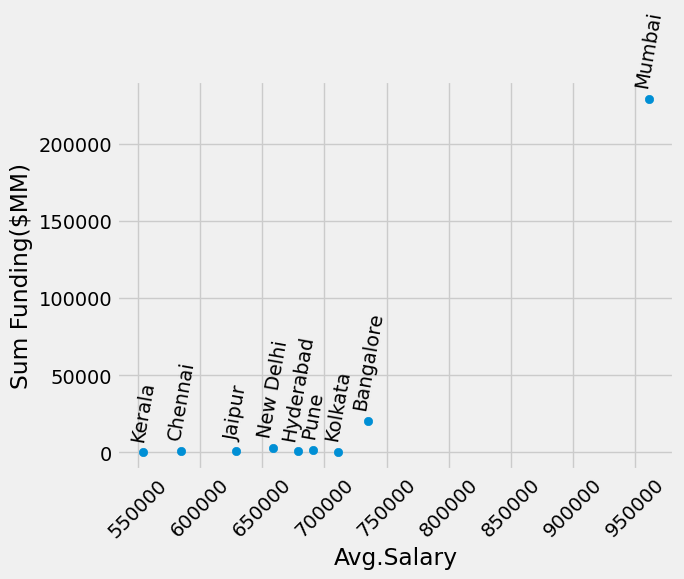

In [61]:
x = sps_fnd_loc['Avg.Salary']
y = sps_fnd_loc['Sum Funding($MM)']
labels = sps_fnd_loc['City']

plt.style.use('fivethirtyeight')
plt.xlabel('Avg.Salary')
plt.ylabel('Sum Funding($MM)')
plt.scatter(x, y)
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', rotation = 80)
    plt.xticks(rotation=45)

In [62]:
best_city = sps_fnd_loc[sps_fnd_loc['Sum Funding($MM)'] > 200000]
best_city

,City,Avg.Rating,Avg.Salary,Nr. Companies Founded,Sum Funding($MM)
6,Mumbai,3.881709,961180.368491,376,229347.049542


6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 

In [63]:
import requests
from bs4 import BeautifulSoup


url = 'https://www.census2011.co.in/city.php'


response = requests.get(url)


if response.status_code == 200:
    
    soup = BeautifulSoup(response.content, 'html.parser')

    
    table = soup.find('table')

    
    if table:
        
        rows = table.find_all('tr')

        
        data = []

        
        for row in rows:
            
            columns = row.find_all('td')

            
            raw_data = [column.get_text() for column in columns]

            
            data.append(raw_data)

        
        cities_raw= pd.DataFrame(data)

        cities = cities_raw.drop([0])

        
        cities.reset_index(drop=True, inplace=True)
        
        
    else:
        print('Nessuna tabella trovata.')
else:
    print('Errore nella richiesta HTTP.')


In [64]:
cities.columns = ['#', 'City', 'State', 'Population', 'Metropolitan', 'Sexratio', 'Literacy']

In [65]:
cities = cities.drop(cities.columns[0], axis=1)

In [66]:
colonne_da_convertire = ['Population', 'Metropolitan', 'Sexratio', 'Literacy']
cities[colonne_da_convertire] = cities[colonne_da_convertire].apply(lambda x: x.str.replace(',', ''))


cities[colonne_da_convertire] = cities[colonne_da_convertire].apply(pd.to_numeric)


In [67]:
cities_sorted = cities.sort_values(by='Literacy', ascending=False)
cities_sorted.head(1)


,City,State,Population,Metropolitan,Sexratio,Literacy
150,Aizawl,Mizoram,293416,293416,1025,98.36


In [68]:
cities['City'] = cities['City'].replace('Delhi', 'New Delhi')

In [69]:
cities

,City,State,Population,Metropolitan,Sexratio,Literacy
0,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,New Delhi,Delhi,11034555,16314838,876,87.59
2,Bangalore,Karnataka,8443675,8499399,923,88.71
3,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...
493,Gangtok,Sikkim,100286,100286,912,89.33
494,Datia,Madhya Pradesh,100284,100284,900,80.56
495,Nagda,Madhya Pradesh,100039,100039,947,80.71
496,Banswara,Rajasthan,99969,101177,960,85.72


In [70]:
sps_fnd_loc_lit = pd.merge(sps_fnd_loc, cities, how = 'inner',on='City')

In [71]:
sps_fnd_loc_lit

,City,Avg.Rating,Avg.Salary,Nr. Companies Founded,Sum Funding($MM),State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,765,20329.169358,Karnataka,8443675,8499399,923,88.71
1,Chennai,3.902726,584559.661513,87,1013.128146,Tamil Nadu,4646732,8696010,989,90.18
2,Hyderabad,3.914484,679099.157376,61,423.781000,Andhra Pradesh,6731790,7749334,955,83.26
3,Jaipur,3.940741,629135.802469,22,499.100000,Rajasthan,3046163,3046163,900,83.33
4,Kolkata,4.024719,710925.573034,16,56.366500,West Bengal,4496694,14112536,908,86.31
5,Mumbai,3.881709,961180.368491,376,229347.049542,Maharashtra,12442373,18414288,853,89.73
6,New Delhi,3.943415,658756.735632,180,2568.642000,Delhi,11034555,16314838,876,87.59
7,Pune,3.886082,690476.311153,84,1356.044000,Maharashtra,3124458,5049968,948,89.56


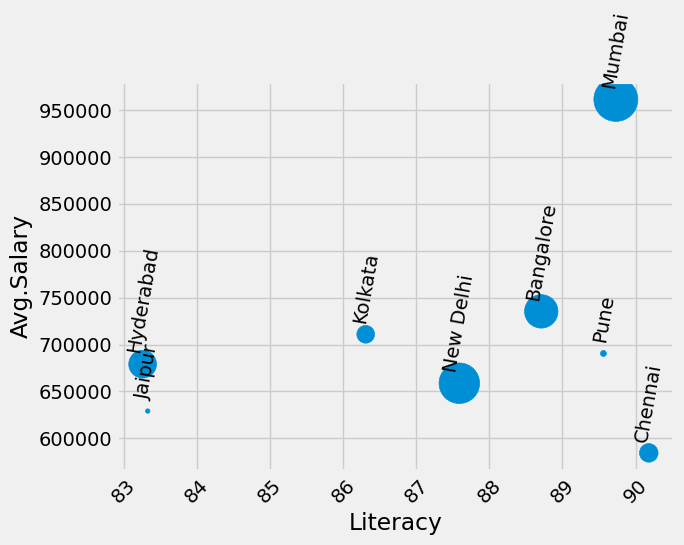

In [73]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(10, 1000)) 
sizes = scaler.fit_transform(sps_fnd_loc_lit['Population'].values.reshape(-1, 1)).flatten()


a = sps_fnd_loc_lit['Literacy']
b = sps_fnd_loc_lit['Avg.Salary']
labels1 = sps_fnd_loc_lit['City']

plt.style.use('fivethirtyeight')
plt.xlabel('Literacy')
plt.ylabel('Avg.Salary')
plt.scatter(a, b, s=sizes)
for i, label in enumerate(labels1):
    plt.annotate(label, (a[i], b[i]), textcoords="offset points", xytext=(0, 10), ha='center', rotation=80)
plt.xticks(rotation=45)
plt.show()